### Transfer Learning z użyciem Tensorflow Hub

Tensorflow Hub: [tfhub.dev](https://tfhub.dev/)

Tensorflow Hub to biblioteka pozwalająca na wielokrotne i darmowe wykorzystywanie modułów modeli uczenia maszynowego. Tzw. transfer learning pozwala nam skorzystać z wcześniej wyuczonych modeli uczenia maszynowego na bardzo dużych zbiorach danych z zaawansowaną architekturą. Pozwala to zdecydowanie zaoszczędzic sporo czasu na dewelopowaniu własnych modeli, czy chociażby na mocy obliczeniowej wykorzystywaniej podczas trenowania. 

Przykłady użycia transfer learningu:
 - trenowanie modelu z małym zbiorem danych
 - pozwala poprawić generalizację modeli
 - przyśpiesza proces trenowania modeli
 - niski próg wejścia dla osób chcących poznać zastosowania modeli

### <a name='a1'></a>Import bibliotek

In [2]:
import numpy as np
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt
print(f'Tensorflow version: {tf.__version__}')
print(f'Tensorflow Hub version: {hub.__version__}')

Tensorflow version: 2.1.0
Tensorflow Hub version: 0.8.0


### <a name='a2'></a> Załadowanie modelu

In [3]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

### <a name='a2'></a> Załadowanie etykiet

In [4]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

16384/10484 [==============================================] - 0s 0us/step


array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

### <a name='a2'></a> Załadowanie obrazu

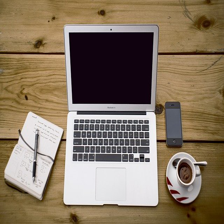

In [8]:
img = Image.open('office.jpg').resize(IMAGE_SHAPE)
img

### <a name='a2'></a> Predykcja na podstawie modelu

In [11]:
img_arr = np.array(img) / 255.
img_arr = np.expand_dims(img_arr, axis=0)
results = classifier.predict(img_arr)
predicted_class = np.argmax(results[0], axis=-1)
predicted_class_name = imagenet_labels[predicted_class]
predicted_class_name

'notebook'